# Steps
#####  1. import required libraries 
#####  2. load data set
#####  3. Split data set to train and test 
#####  4. Scale numerical features
#####  5. Optimize hyper parameters
#####  6. Get best parameters and train
#####  7. Create accuracy values and confusion matrix
#####  8. Evaluate both models and select the best 


# Spam Detector

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import mean_squared_error


## Retrieve the Data

The data is located at [https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv](https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv)

Dataset Source: [UCI Machine Learning Library](https://archive.ics.uci.edu/dataset/94/spambase)

Import the data using Pandas. Display the resulting DataFrame to confirm the import was successful.

In [2]:
# Import the data
data = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv")
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

*Given the complexity of data set and the ability of Random Forest to recognize patterns using multiple tree classification,
I would say randomforest would make a good model than logistic regression. *

## Split the Data into Training and Testing Sets

In [3]:
# Create the labels set `y` and features DataFrame `X`
#features
x = data.drop(columns='spam',axis=1)
display(x.shape)
#Target
y = data['spam']
display(y.shape)


(4601, 57)

(4601,)

In [4]:
# Check the balance of the labels variable (`y`) by using the `value_counts` function.
print(y.value_counts())

spam
0    2788
1    1813
Name: count, dtype: int64


In [5]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

print(f'feature Train size {X_train.shape} target train size {y_train.shape}')

feature Train size (3680, 57) target train size (3680,)


## Scale the Features

Use the `StandardScaler` to scale the features data. Remember that only `X_train` and `X_test` DataFrames should be scaled.

In [6]:

# Create the StandardScaler instance
# Scale the training data
scaler = StandardScaler()

In [7]:
# Fit the Standard Scaler with the training data
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

# Scale the test data
X_test_scaled = scaler.transform(X_test)


## Create and Fit a Logistic Regression Model

Create a Logistic Regression model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [8]:
# Train a Logistic Regression model and print the model score
# Define the hyperparameters and their possible values
# warnings.filterwarnings(action= 'ignore')
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],
#     'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
#     'penalty': ['l1', 'l2'],
#     'max_iter': [100, 200, 300]
# }

# # Create a logistic regression model
# logreg = LogisticRegression()

# # Use GridSearchCV to find the best hyperparameters
# grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train_scaled, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_

best_params = {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
print(f'Best parameters for logistic Regression {best_params}')
# Train the model with the best hyperparameters
best_logit_model = LogisticRegression(**best_params, random_state=1)
best_logit_model.fit(X_train, y_train)



Best parameters for logistic Regression {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


LogisticRegression(C=10, random_state=1, solver='liblinear')

In [9]:
# Make and save testing predictions with the saved logistic regression model using the test data
logit_preds = best_logit_model.predict(X_test_scaled)
# Review the predictions
logit_preds[:10]


c:\Users\hafto\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

In [10]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
accuracy_logit = accuracy_score(y_test, logit_preds).round(2)
test_error = mean_squared_error(y_test, logit_preds)
print(f"Logistic Regression accuracy score {accuracy_logit}")
print(f'Mean squred error {test_error}')
                            

Logistic Regression accuracy score 0.88
Mean squred error 0.12269272529858849


In [11]:
#Evaluate test and train 
warnings.filterwarnings(action= 'ignore')

#Training  Score
training_score = best_logit_model.score(X_train_scaled,y_train)
print(f'Training score is :{training_score}')

#Test Score
test_score = best_logit_model.score(X_test_scaled,y_test)
print(f'Test score is :{test_score}')

Training score is :0.8894021739130434
Test score is :0.8773072747014115


## Create and Fit a Random Forest Classifier Model

Create a Random Forest Classifier model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [12]:
# Train a Random Forest Classifier model and print the model score
# random_forest = RandomForestClassifier()
# param_grid = {
#     'n_estimators': [10, 50, 100],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# # Use GridSearchCV to find the best combination of hyperparameters
# grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5)
# grid_search.fit(X_train_scaled, y_train)

# # Print the best hyperparameters
# best_rf_param = grid_search.best_params_
# print("Best Hyperparameters:", grid_search.best_params_)
best_rf_param = {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
print(f'best parm for random forest {best_rf_param}')
# Train the model with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_rf_param,oob_score = True,random_state=1)
best_rf_model.fit(X_train_scaled,y_train)

best parm for random forest {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


RandomForestClassifier(max_features='log2', min_samples_split=5,
                       n_estimators=50, oob_score=True, random_state=1)

In [13]:
# Make and save testing predictions with the saved random forest  model using the test data
rf_preds = best_rf_model.predict(X_test_scaled)

# Review the predictions
rf_preds[:10]

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

In [14]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
accuracy_rf = accuracy_score(y_test,rf_preds).round(2)
oob_error = 1 - best_rf_model.oob_score_
test_error = mean_squared_error(y_test, rf_preds)
print(f"Random Forest accuracy score {accuracy_rf}")
print(f'OOB score {oob_error.round(2)}')
print(f'Mean squred error {test_error.round(2)}')

Random Forest accuracy score 0.96
OOB score 0.05
Mean squred error 0.04


In [15]:
#Evaluate test and train 
warnings.filterwarnings(action= 'ignore')

#Training  Score
training_score = best_rf_model.score(X_train_scaled,y_train)
print(f'Training score is :{training_score}')

#Test Score
test_score = best_rf_model.score(X_test_scaled,y_test)
print(f'Test score is :{test_score}')

Training score is :0.9956521739130435
Test score is :0.9554831704668838


## Evaluate the Models

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the following markdown cell.

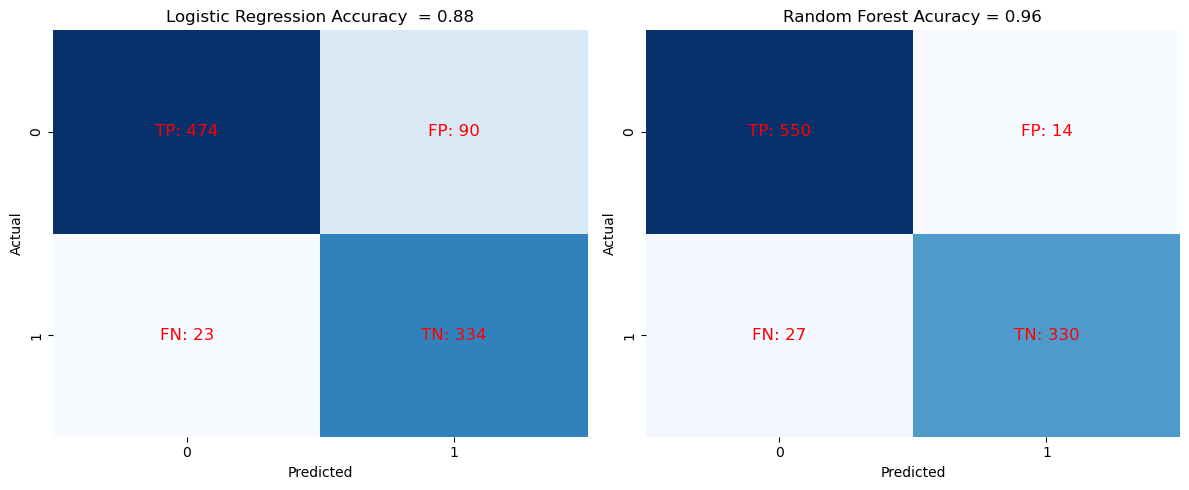

In [16]:
#Create confusion matrics for logistc regression
cm_logit = confusion_matrix(y_test, logit_preds)
cm_rf = confusion_matrix(y_test,rf_preds)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_logit,  fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0,1], ax = axes[0], cbar=False)
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title(f'Logistic Regression Accuracy  = {accuracy_logit}')
axes[0].text(0.5, 0.5, f'TP: {cm_logit[0, 0]}', ha='center', va='center', color='red', fontsize=12)
axes[0].text(0.5, 1.5, f'FN: {cm_logit[1, 0]}', ha='center', va='center', color='red', fontsize=12)
axes[0].text(1.5, 0.5, f'FP: {cm_logit[0, 1]}', ha='center', va='center', color='red', fontsize=12)
axes[0].text(1.5, 1.5, f'TN: {cm_logit[1, 1]}', ha='center', va='center', color='red', fontsize=12)

sns.heatmap(cm_rf,  fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0,1], ax = axes[1],cbar = False)
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title(f'Random Forest Acuracy = {accuracy_rf}')
axes[1].text(0.5, 0.5, f'TP: {cm_rf[0, 0]}', ha='center', va='center', color='red', fontsize=12)
axes[1].text(0.5, 1.5, f'FN: {cm_rf[1, 0]}', ha='center', va='center', color='red', fontsize=12)
axes[1].text(1.5, 0.5, f'FP: {cm_rf[0, 1]}', ha='center', va='center', color='red', fontsize=12)
axes[1].text(1.5, 1.5, f'TN: {cm_rf[1, 1]}', ha='center', va='center', color='red', fontsize=12)

plt.tight_layout()
plt.show()


* As seen in the above plot random forest model accuracy is higher than logistic regression accuracy and type 1 error is also smaller in random forest model these Randomforest model is the best option for the given data set modeling. Test error and OOB error  are close so random forest is performing well for new data set.